<a href="https://colab.research.google.com/github/Skurmes/Data-Science-Project/blob/EtherFile/Copy_of_Ethereum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Ethereum Data Analysis Chart

In [43]:
#Import the libraries

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as yf
import dataframes as df

from fbprophet import Prophet
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
#Loading the data

from google.colab import files
upload = files.upload()

In [ ]:
#Storing the data into Dataframes
df_ETH = pd.read_csv('ETH-USD (1).csv')

In [ ]:
#Printing the data
df_ETH

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-23,242.537018,244.864410,239.759735,244.142151,244.142151,6.624530e+09
1,2020-06-24,244.185928,248.508026,232.807739,235.772461,235.772461,8.815030e+09
2,2020-06-25,235.702850,236.053406,230.296600,232.944489,232.944489,7.010426e+09
3,2020-06-26,232.877487,233.901932,229.259460,229.668045,229.668045,7.187490e+09
4,2020-06-27,229.631485,232.493423,220.564575,222.959793,222.959793,6.918381e+09
...,...,...,...,...,...,...,...
361,2021-06-19,2235.159180,2278.415039,2168.885010,2178.499023,2178.499023,1.876585e+10
362,2021-06-20,2171.337891,2275.382813,2049.962646,2246.364502,2246.364502,2.253593e+10
363,2021-06-21,2245.317871,2259.464111,1867.185425,1888.447510,1888.447510,3.374517e+10
364,2021-06-22,1886.667603,1993.159790,1707.600586,1874.950073,1874.950073,3.554725e+10


In [ ]:
#Statistical labeling
df_ETH.describe()


,Open,High,Low,Close,Adj Close,Volume
count,363.000000,363.000000,363.000000,363.000000,363.000000,3.630000e+02
mean,1204.019287,1256.404665,1144.204369,1208.678389,1208.678389,2.367018e+10
std,970.136810,1019.286400,910.345591,969.682697,969.682697,1.419217e+10
min,222.914490,228.598282,219.472672,222.959793,222.959793,5.109033e+09
25%,386.373398,395.907883,374.979446,386.528228,386.528228,1.242225e+10
50%,638.315186,662.699097,628.334961,642.868958,642.868958,2.024132e+10
75%,1851.146485,1933.616760,1791.458191,1861.306579,1861.306579,3.193287e+10
max,4174.635742,4362.350586,3785.848633,4168.701172,4168.701172,8.448291e+10


In [ ]:

df_ETH.dropna(inplace=True)
df_ETH

In [ ]:
#Now including the Prediction Column
projection = 15

df_ETH['Prediction'] = df_ETH[['Close']].shift(-projection)

df_ETH

,Date,Open,High,Low,Close,Adj Close,Volume,Prediction
0,2020-06-23,242.537018,244.864410,239.759735,244.142151,244.142151,6.624530e+09,246.670013
1,2020-06-24,244.185928,248.508026,232.807739,235.772461,235.772461,8.815030e+09,243.015961
2,2020-06-25,235.702850,236.053406,230.296600,232.944489,232.944489,7.010426e+09,240.984985
3,2020-06-26,232.877487,233.901932,229.259460,229.668045,229.668045,7.187490e+09,239.458176
4,2020-06-27,229.631485,232.493423,220.564575,222.959793,222.959793,6.918381e+09,242.131699
...,...,...,...,...,...,...,...,...
349,2021-06-07,2713.047363,2845.185059,2583.995117,2590.263184,2590.263184,3.060011e+10,NaN
350,2021-06-08,2594.602295,2620.846191,2315.546631,2517.438721,2517.438721,4.190974e+10,NaN
351,2021-06-09,2510.199219,2625.070557,2412.197754,2608.267090,2608.267090,3.607583e+10,NaN
352,2021-06-10,2611.142578,2619.957764,2435.401611,2471.518555,2471.518555,2.875363e+10,NaN


In [ ]:

X = np.array(df_ETH[['Close']])

X = X[:-projection]
print(X)

In [ ]:

y = df_ETH['Prediction'].values
y = y[:-projection]
      
print(y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .15)

In [ ]:

linReg = LinearRegression()
linReg.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:

linReg_confidence = linReg.score(x_test, y_test)
print('Liner Regression Confidence: ', linReg_confidence)


Liner Regression Confidence:  0.8527813111654802


In [ ]:
x_projection = np.array(df_ETH[['Close']])[-projection:]
print(x_projection)

In [ ]:
#Prediction of Data results within 15% split
linReg_prediction = linReg.predict(x_projection)
print(linReg_prediction)

[2414.94352401 2286.41913904 2387.84492842 2685.04217498 2610.49840722
 2676.96746576 2813.37345309 2660.5531971  2607.80564493 2685.17716981
 2570.89974753 2504.23132399 2587.38173698 2462.19290791 2354.39684212]


In [45]:
#Data for Crypocurrency Graph

end = dt.datetime.now()
start = dt.date(end.year - 4, end.month, end.day)

tickers = ['BTC-USD', 'ETH-USD', 'DOGE-USD']
end

datetime.datetime(2021, 7, 2, 20, 41, 10, 658713)

In [46]:
yf.download(tickers, start, end)

[*********************100%***********************]  3 of 3 completed


Adj Close            ...      Volume             
                 BTC-USD  DOGE-USD  ...    DOGE-USD      ETH-USD
Date                                ...                         
2017-07-02   2506.469971  0.002481  ...     6310430   1123330048
2017-07-03   2564.060059  0.002533  ...     7488410    851408000
2017-07-04   2601.639893  0.002518  ...     5302360    687691008
2017-07-05   2601.989990  0.002714  ...    17293700    790256000
2017-07-06   2608.560059  0.002636  ...    10702300    623080000
...                  ...       ...  ...         ...          ...
2021-06-28  34434.335938  0.256857  ...  1932994784  25514602841
2021-06-29  35867.777344  0.262769  ...  2192562738  24815124419
2021-06-30  35040.835938  0.254215  ...  2047763830  25828056268
2021-07-01  33572.117188  0.244549  ...  2463946548  29061701793
2021-07-02  33262.261719  0.242219  ...  1339030656  31117991936

[1458 rows x 18 columns]

In [86]:
#Seperating Ethereum Data for graphical analysis
df_ETH = yf.download('ETH-USD', start)
df_ETH

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-07-02,275.122986,295.509003,262.519989,287.987000,287.987000,1123330048
2017-07-03,288.414001,291.104004,281.175995,282.898010,282.898010,851408000
2017-07-04,282.191010,287.388000,273.110992,273.303009,273.303009,687691008
2017-07-05,273.098999,275.125000,261.446991,268.773987,268.773987,790256000
2017-07-06,268.858002,278.476013,265.511993,270.549011,270.549011,623080000
...,...,...,...,...,...,...
2021-06-28,1981.386475,2139.805420,1963.615479,2079.657471,2079.657471,25514602841
2021-06-29,2083.448730,2242.238770,2076.240234,2160.768311,2160.768311,24815124419
2021-06-30,2164.216309,2282.989014,2090.760742,2274.547607,2274.547607,25828056268


In [87]:
#Ajusting Date column to prevent errors
df_ETH = df_ETH.reset_index()
df_ETH

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-07-02,275.122986,295.509003,262.519989,287.987000,287.987000,1123330048
1,2017-07-03,288.414001,291.104004,281.175995,282.898010,282.898010,851408000
2,2017-07-04,282.191010,287.388000,273.110992,273.303009,273.303009,687691008
3,2017-07-05,273.098999,275.125000,261.446991,268.773987,268.773987,790256000
4,2017-07-06,268.858002,278.476013,265.511993,270.549011,270.549011,623080000
...,...,...,...,...,...,...,...
1453,2021-06-28,1981.386475,2139.805420,1963.615479,2079.657471,2079.657471,25514602841
1454,2021-06-29,2083.448730,2242.238770,2076.240234,2160.768311,2160.768311,24815124419
1455,2021-06-30,2164.216309,2282.989014,2090.760742,2274.547607,2274.547607,25828056268
1456,2021-07-01,2274.397461,2274.397461,2081.081055,2113.605469,2113.605469,29061701793


In [95]:
#Labeling Column for Graph interpretation
df_ETH[['ds', 'y']] = df_ETH[['Date', 'Adj Close']]
df_ETH

,Date,Open,High,Low,Close,Adj Close,Volume,ds,y
0,2017-07-02,275.122986,295.509003,262.519989,287.987000,287.987000,1123330048,2017-07-02,287.987000
1,2017-07-03,288.414001,291.104004,281.175995,282.898010,282.898010,851408000,2017-07-03,282.898010
2,2017-07-04,282.191010,287.388000,273.110992,273.303009,273.303009,687691008,2017-07-04,273.303009
3,2017-07-05,273.098999,275.125000,261.446991,268.773987,268.773987,790256000,2017-07-05,268.773987
4,2017-07-06,268.858002,278.476013,265.511993,270.549011,270.549011,623080000,2017-07-06,270.549011
...,...,...,...,...,...,...,...,...,...
1453,2021-06-28,1981.386475,2139.805420,1963.615479,2079.657471,2079.657471,25514602841,2021-06-28,2079.657471
1454,2021-06-29,2083.448730,2242.238770,2076.240234,2160.768311,2160.768311,24815124419,2021-06-29,2160.768311
1455,2021-06-30,2164.216309,2282.989014,2090.760742,2274.547607,2274.547607,25828056268,2021-06-30,2274.547607
1456,2021-07-01,2274.397461,2274.397461,2081.081055,2113.605469,2113.605469,29061701793,2021-07-01,2113.605469


In [96]:
model = Prophet()

model.fit(df_ETH)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [90]:
future = model.make_future_dataframe(365)

In [ ]:
#Data for Graph pulled from Prediction
forecast = model.predict(future)
forecast

<function matplotlib.pyplot.show>

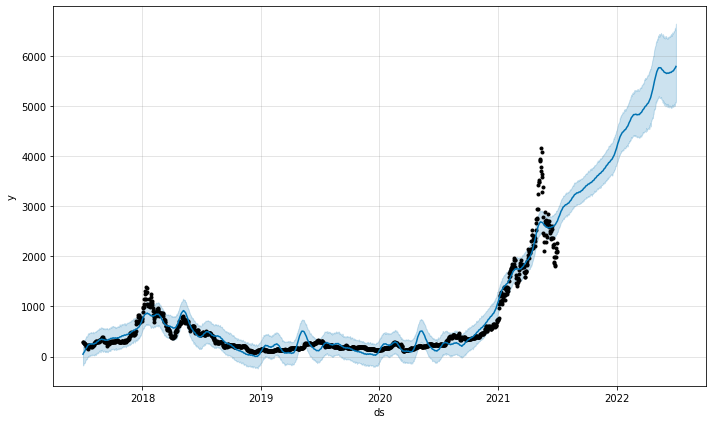

In [92]:
model.plot(forecast)
plt.show

<function matplotlib.pyplot.show>

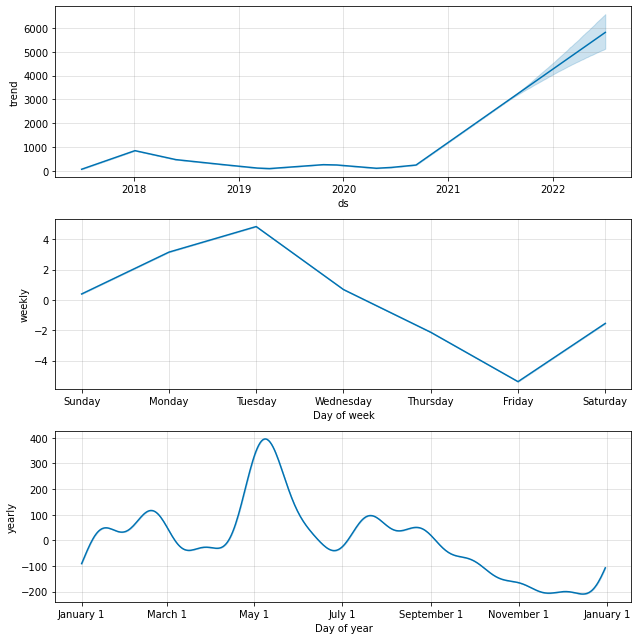

In [93]:
model.plot_components(forecast)
plt.show